Литература:  
https://habr.com/ru/post/460445/  
https://elar.urfu.ru/bitstream/10995/46985/1/978-5-7996-0825-5_2013.pdf    
https://www.sibsau.ru/sveden/edufiles/129056/  
https://www.omgtu.ru/general_information/faculties/radio_engineering_department/department_quot_radio_devices_and_diagnostic_systems_quot/educational-materials/Digital_signal_processing/Textbook.pdf  

## I) **Шум квантования**  
а) Научится генерировать синусойду нужной частоты при заданной частоте дискретизации.  
Синусоида:  
f(x) = A sin (ωt + φ),  
ω=2 πf, где f — частота в Герцах.      
б) Вычислить Фурье преобразование от такого сигнала.  
Преобразование Фурье.
 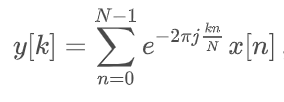  
Полезные ссылки:  
https://proglib.io/p/preobrazovaniya-fure-dlya-obrabotki-signalov-s-pomoshchyu-python-2020-11-03  
https://docs.scipy.org/doc/scipy/reference/tutorial/fft.html    
https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.fft.fft.html#scipy.fft.fft  
в) Округлить вычисленный синус до разной степени точности и посмотреть влияние: график с фурье преобразованиями для разных округлений и идеал из б.  
Округление… например 0.00001,  0.0001,  0.001,  0.01,  0.1. Или отмастшабированный на соответствующее количество бит.  

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import  fft, fftfreq, rfft, rfftfreq, irfft

### а) Научится генерировать синусойду нужной частоты при заданной частоте дискретизации. 

In [2]:
def sinusoida(fs = 48000, f = 10, duration = 5, phi = 0, A = 1):
        # fs - частота дискретизации Гц - sample_rate
        # f - частота синусоиды
        # phi - начальная фаза
        # A - амплитуда
        # duration - длина сгенерированной выборки
        # endpoint = False периодический сигнал 
        
    time_t = np.linspace(0, duration, int(fs*duration), endpoint = False)
    freq = time_t*f
    signal_input = A*np.sin((2*np.pi)*freq + phi)
        
    return time_t, signal_input

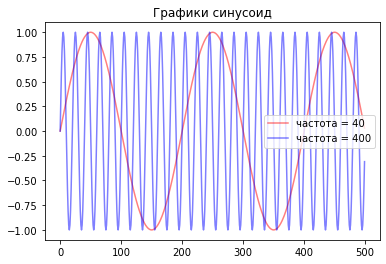

In [3]:
FS = 8000 #SAMPLE_RATE
DURATION = 3

# Функция синусоиды нужной частоты при заданной частоте дискретизации FS
x, y = sinusoida(FS, 40, DURATION)
xx, yy = sinusoida(FS, 400, DURATION)

# График синусоиды
plt.title('Графики синусоид')
plt.plot(y[:500], color = 'r', alpha = 0.5, label = 'частота = 40')
plt.plot(yy[:500], color = 'b', alpha = 0.5, label = 'частота = 400')
plt.legend()
plt.show()

### б) Вычислить Фурье преобразование от такого сигнала.

In [4]:
# Реализация преобразования Фурье

def my_fft(y):
    N = len(y)
        
    f = [np.sum(y * np.exp(-2j * np.pi * k * np.arange(N)/N)) for k in range(N)]
    
    return f

def my_fftfreq(n, d):
    # d - duration
    # n - sample_rate
    
    if n%2 == 0: # четное 
        f = np.hstack([np.arange(n//2), np.arange(-n//2, 0)])/(d*n)
    else: # не четное
        f = np.hstack([np.arange((n+1)//2), np.arange(-(n-1)//2, 0)])/(d*n)
    return f

In [5]:
%%time
# Возьмём одну синусоиду
FS = 8000 
DURATION = 3
x, y = sinusoida(FS, 40, DURATION)

# количество точек 
N = int(FS*DURATION)
# расстояние между точками
T = DURATION / N

# Вычислим для неё преобразование Фурье
my_yf = my_fft(y)
my_xf = my_fftfreq(N, T)

Wall time: 58 s


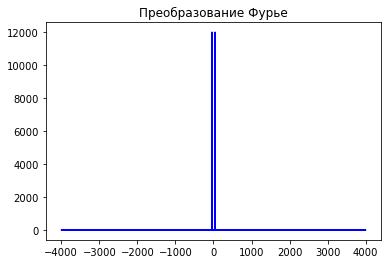

In [6]:
# Построим график
plt.plot(my_xf, np.abs(my_yf), color = 'b')
plt.title('Преобразование Фурье')
plt.show()

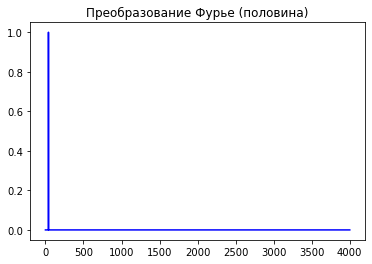

In [7]:
plt.plot(my_xf[:N//2], 2.0/N * np.abs(my_yf[0:N//2]), color = 'b')
plt.title('Преобразование Фурье (половина)')
plt.show()

### в) Округлить вычисленный синус до разной степени точности и посмотреть влияние: график с фурье преобразованиями для разных округлений и идеал из б.  
Округление… например 0.00001,  0.0001,  0.001,  0.01,  0.1. Или отмастшабированный на соответствующее количество бит. 

In [64]:
FS = 8000 
DURATION = 3
x, y = sinusoida(FS, 40, DURATION)

# количество точек 
N = int(FS*DURATION)
# расстояние между точками
T = DURATION / N

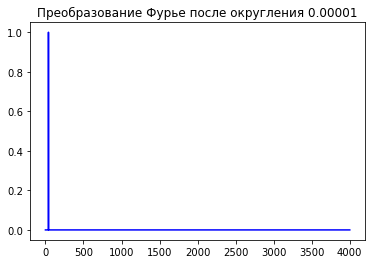

In [9]:
# Фурье после округления 0.00001

yf_one = 2.0/N * np.abs(fft(np.around(y, 5))[0:N//2])
xf = fftfreq(N, T)[0:N//2]

plt.plot(xf, yf_one, color = 'b')
plt.title('Преобразование Фурье после округления 0.00001')
plt.show()

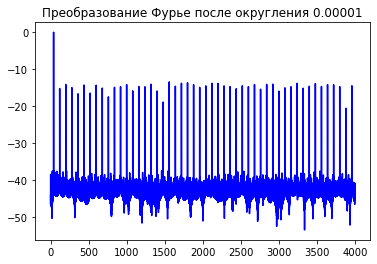

In [10]:
# Фурье после округления 0.00001

yf_one = 2.0/N * np.abs(fft(np.around(y, 5))[0:N//2])
xf = fftfreq(N, T)[0:N//2]

plt.plot(xf, np.log(yf_one), color = 'b')
plt.title('Преобразование Фурье после округления 0.00001')
plt.show()

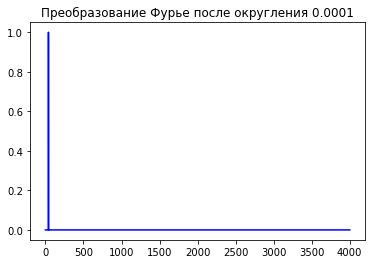

In [65]:
# Фурье после округления 0.0001

yf_one = 2.0/N * np.abs(fft(np.around(y, 4))[0:N//2])
xf = fftfreq(N, T)[0:N//2]

plt.plot(xf, yf_one, color = 'b')
plt.title('Преобразование Фурье после округления 0.0001')
plt.show()

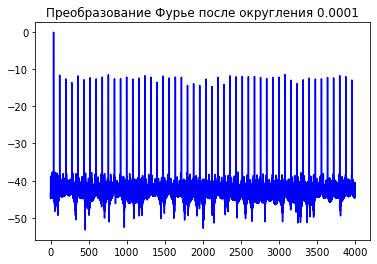

In [11]:
# Фурье после округления 0.0001

yf_one = 2.0/N * np.abs(fft(np.around(y, 4))[0:N//2])
xf = fftfreq(N, T)[0:N//2]

plt.plot(xf, np.log(yf_one), color = 'b')
plt.title('Преобразование Фурье после округления 0.0001')
plt.show()

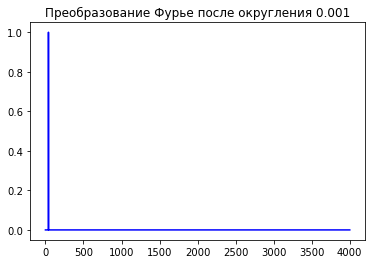

In [66]:
# Фурье после округления 0.001

yf_one = 2.0/N * np.abs(fft(np.around(y, 3))[0:N//2])
xf = fftfreq(N, T)[0:N//2]

plt.plot(xf, yf_one, color = 'b')
plt.title('Преобразование Фурье после округления 0.001')
plt.show()

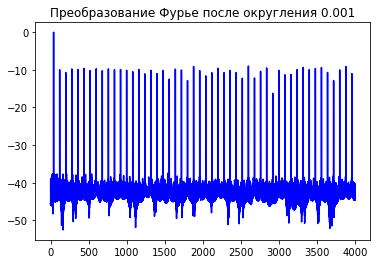

In [12]:
# Фурье после округления 0.001

yf_one = 2.0/N * np.abs(fft(np.around(y, 3))[0:N//2])
xf = fftfreq(N, T)[0:N//2]

plt.plot(xf, np.log(yf_one), color = 'b')
plt.title('Преобразование Фурье после округления 0.001')
plt.show()

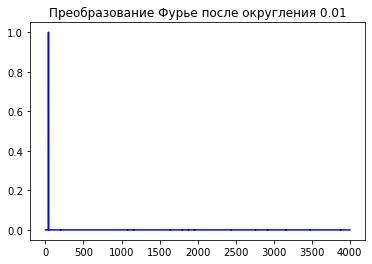

In [14]:
# Фурье после округления 0.01

yf_one = 2.0/N * np.abs(fft(np.around(y, 2))[0:N//2])
xf = fftfreq(N, T)[0:N//2]

plt.plot(xf, yf_one, color = 'b')
plt.title('Преобразование Фурье после округления 0.01')
plt.show()

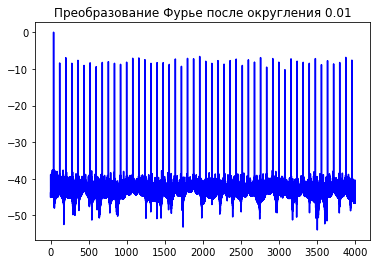

In [13]:
# Фурье после округления 0.01

yf_one = 2.0/N * np.abs(fft(np.around(y, 2))[0:N//2])
xf = fftfreq(N, T)[0:N//2]

plt.plot(xf, np.log(yf_one), color = 'b')
plt.title('Преобразование Фурье после округления 0.01')
plt.show()

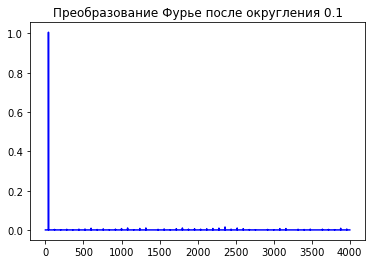

In [16]:
# Фурье после округления 0.1
# Появились колебания 

yf_one = 2.0/N * np.abs(fft(np.around(y, 1))[0:N//2])
xf = fftfreq(N, T)[0:N//2]

plt.plot(xf, yf_one, color = 'b')
plt.title('Преобразование Фурье после округления 0.1')
plt.show()

D:\Anaconda\envs\myenv\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


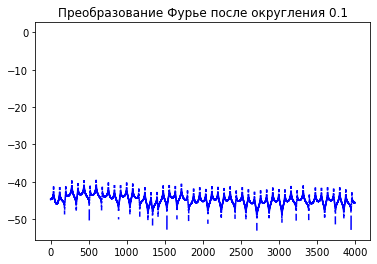

In [15]:
# Фурье после округления 0.1
# Появились колебания 

yf_one = 2.0/N * np.abs(fft(np.around(y, 1))[0:N//2])
xf = fftfreq(N, T)[0:N//2]

plt.plot(xf, np.log(yf_one), color = 'b')
plt.title('Преобразование Фурье после округления 0.1')
plt.show()

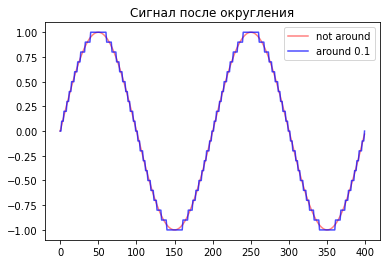

In [17]:
sample = y[:400]

plt.plot(sample, color = 'r', alpha = 0.5, label = 'not around')
plt.plot(np.around(sample, 1), color = 'b', alpha = 0.7, label = 'around 0.1')
plt.title('Сигнал после округления')
plt.legend()
plt.show()

In [18]:
# # Нормализация сигнала
# norm_new_sig = np.int16(y * (32767 / y.max()))
# plt.plot(norm_new_sig[:1000])
# plt.show()

## II) **Спектрграмма**  
а) Считать аудио файл (можно использовать библиотечные функции)  
https://musicinformationretrieval.com/ipython_audio.html  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html  
б) Научится добавлять писк (правильно подобранная синусойда) к аудио данным и записывать файл обратно. Убедится что слышен высокочастотный писк.  
в) Посчитать спектрограмму (нужно реализовать самостоятельно)  
https://nbviewer.org/github/capitanov/dsp-theory/blob/master/src/dsp_theory_2_spectrum.ipynb  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html  
https://habr.com/ru/post/338704/  
https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.pcolormesh.html#matplotlib.axes.Axes.pcolormesh  
г) Показать влияние синусоиды  
https://habr.com/ru/post/338704/  
д) исследовать влияние различных оконных функций на построение в. 
https://ru.wikipedia.org/wiki/%D0%9E%D0%BA%D0%BE%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BF%D1%80%D0%B5%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%A4%D1%83%D1%80%D1%8C%D0%B5  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.get_window.html#scipy.signal.get_window  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.exponential.html#scipy.signal.windows.exponential  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.hamming.html#scipy.signal.windows.hamming  
https://nbviewer.org/github/hukenovs/dsp-theory/blob/master/src/dsp_theory_7_windows.ipynb  
http://www.dsplib.ru/content/winex/winex.html  

Спектрограмму сформировать можно двумя способами: аппроксимировать как набор фильтров или рассчитать сигнал по времени с помощью оконного преобразования Фурье.  
  
Распространенное представление спектрограммы – это двумерная диаграмма: на горизонтальной оси представлено время, по вертикальной оси — частота; третье измерение с указанием амплитуды на определенной частоте в конкретный момент времени представлено интенсивностью или цветом каждой точки изображения. Источники интенсивного звука отображаются красным цветом, а тихие области – темно-синим.  
https://vc.ru/tech/265636-risuem-zvuk-chast-1  
https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.pcolormesh.html#matplotlib.axes.Axes.pcolormesh  
  
Спектральный анализ периодических функций заключается в нахождении амплитуды Аk и фазы j k гармоник (косинусоид) ряда Фурье.  
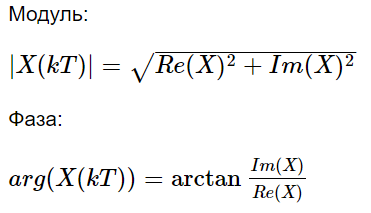

Спектрограмма сигнала s(t) может быть оценена путём вычисления квадрата амплитуды оконного преобразования Фурье сигнала s(t). Сигнал разбивается на части, которые, как правило, перекрываются, и затем производится преобразование Фурье, чтобы рассчитать величину частотного спектра для каждой части.  Каждая часть соответствует вертикальной линии на изображении — значение амплитуды в зависимости от частоты в каждый момент времени.  
https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B5%D0%BA%D1%82%D1%80%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0  

In [19]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import write
import IPython.display as ipd
from scipy.fft import fft, fftshift, fftfreq

import scipy.signal as sig

### а) Считать аудио файл (можно использовать библиотечные функции) 

In [20]:
# Загрузим исходный файл со звуком
fs, data = wavfile.read('./aufile.wav')
print('частота дискретизации fs = ', fs)

частота дискретизации fs =  22050


In [21]:
length = data.shape[0] / fs
print(f"продолжительность = {round(length, 2)} s")

продолжительность = 4.36 s


In [22]:
ipd.Audio(data, rate=fs)

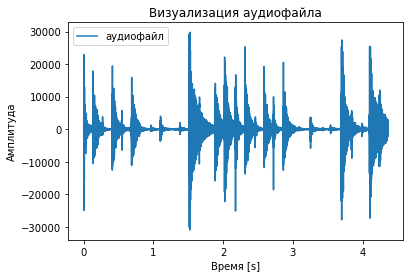

In [23]:
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data, label="аудиофайл")
plt.legend()
plt.xlabel("Время [s]")
plt.ylabel("Амплитуда")
plt.title('Визуализация аудиофайла')
plt.show()

### б) Научится добавлять писк (правильно подобранная синусойда) к аудио данным и записывать файл обратно. Убедится что слышен высокочастотный писк.  

In [24]:
# Сгенерируем писк при помощи ранее объявленной функции синусоиды
# length = duration = необходимая нам продолжительность писка
x_tone, y_tone = sinusoida(fs, 4000, length, 0, 30000)

In [25]:
print('len tone: ', len(y_tone))
print('len audio: ', len(data))

len tone:  96213
len audio:  96213


In [26]:
# как звучит писк
ipd.Audio(y_tone, rate=fs) 

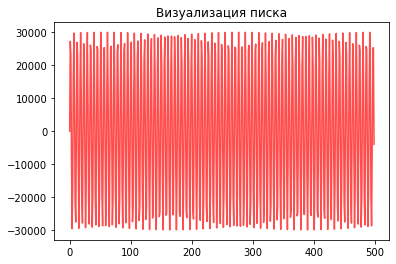

In [27]:
plt.title('Визуализация писка')
plt.plot(y_tone[:500], color = 'r', alpha = 0.7)
plt.show()

In [28]:
# Объединим писк и звук
y_new = data + y_tone

In [29]:
# Запишем, что получилось
ipd.Audio(y_new, rate=fs)

In [30]:
write("audio_tone.wav", fs, y_new)

### г) Показать влияние синусоиды  

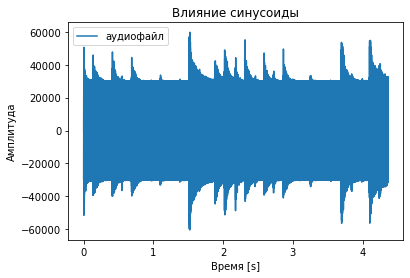

In [31]:
time = np.linspace(0., length, data.shape[0])
plt.title('Влияние синусоиды')
plt.plot(time, y_new, label="аудиофайл")
plt.legend()
plt.xlabel("Время [s]")
plt.ylabel("Амплитуда")
plt.show()

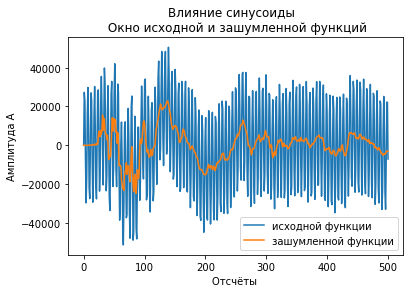

In [32]:
# Обрезаем время аудио
l = 500
part_new = y_new[:l]
part_data = data[:l]
# Задаем временной промежуток 
time = np.linspace(0., l, part_data.shape[0])

plt.title("Влияние синусоиды  \n Окно исходной и зашумленной функций")
plt.plot(time, part_new, label='исходной функции')
plt.plot(time,part_data,label='зашумленной функции')
plt.xlabel("Отсчёты ")
plt.ylabel("Амплитуда А")
plt.legend(loc='best')
plt.show()

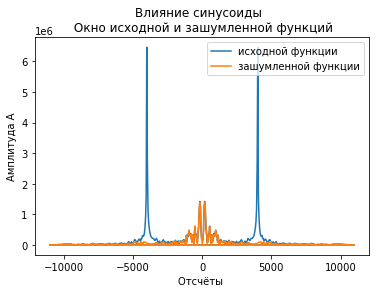

In [33]:
# Обрезаем время аудио
l = 500
part_new = y_new[:l]
part_data = data[:l]
# Задаем временной промежуток 
time = np.linspace(0., l, part_data.shape[0])

part_new = np.abs(fft(part_new)) # Прямое преобразование фурье в частотную область
part_data = np.abs(fft(part_data))

time = fftfreq(l, 1 / fs)

plt.title("Влияние синусоиды  \n Окно исходной и зашумленной функций")
plt.plot(time, part_new, label='исходной функции')
plt.plot(time, part_data,label='зашумленной функции')
plt.xlabel("Отсчёты ")
plt.ylabel("Амплитуда А")
plt.legend()
plt.show()

### в) Посчитать спектрограмму (нужно реализовать самостоятельно)

In [34]:
print('len y_new = ', len(y_new))
signal_len = len(y_new)
fs = 22050

len y_new =  96213


In [35]:
def spectrogram(y_new = y_new, lf = 500, window_step = 125, w = []):
    # y_new - сигнал
    # lf - длина сигнала
    # window_step - шаг окна
    # w - окно
    
    left = 0
    right = 0
    A = []
    
    time = np.linspace(0., lf, lf)
    
    xf = fftfreq(window_step, 1 / fs)

    while right<lf:

        right+=window_step
        
        if len(w)==0:
            window = y_new[left:right]
        else:
            window = y_new[left:right]*w

        yf = fft(window) # Прямое быстрое преобразование фурье в частотную область

        # модуль амплитуды
        window_A=[((yf[i].real)**2+(yf[i].imag)**2)**0.5 for i in range(window_step)]

        A+= window_A

        left+=window_step
    
    time = np.array(time)/3600
    A = np.array(A)
    
    # Модуль амплитуды со второй осью временем для графика pcolormesh
    AA = [ [A[i], time[i]] for i in range(lf)]
                  
    plt.pcolormesh( [time[0], time[window_step//2-1]], xf[:window_step//2], AA[:window_step//2], shading='gouraud')
    plt.suptitle("Спектрограмма")
    plt.ylabel('Частота [Hz]')
    plt.xlabel('Время [sec]')
    plt.show()

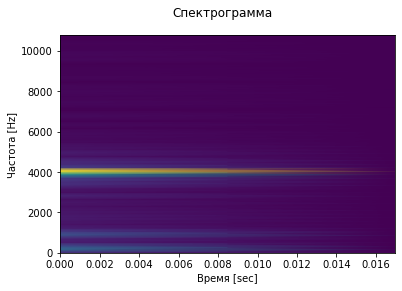

In [36]:
spectrogram(y_new = y_new, lf = 1250, window_step = 125)

### д) исследовать влияние различных оконных функций на построение в.   
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.get_window.html#scipy.signal.get_window  
https://ru.wikipedia.org/wiki/%D0%9E%D0%BA%D0%BE%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BF%D1%80%D0%B5%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%A4%D1%83%D1%80%D1%8C%D0%B5   
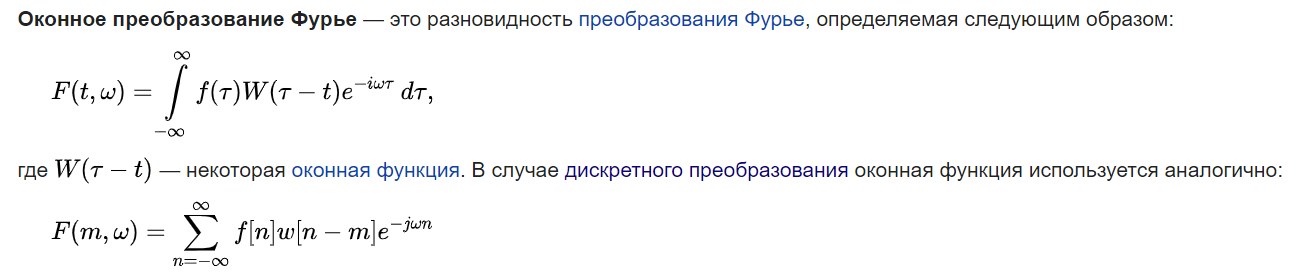  
Существует множество математических формул, визуально улучшающих частотный спектр на разрыве границ окна. Для этого применяются преобразования: треугольное (Барлетта), синус-окно, синус в кубе, синус в 4-й степени, преобразование Парзена, Уэлча, Гаусса, Хеннинга, приподнятый косинус (Хэмминга) и другие.  
Один из примеров окна - экспоненциальное: 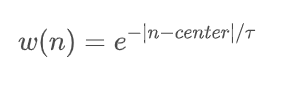  

In [37]:
def exponential_window(step, center = False, tau = 1):
        
    if not center:
        center = (step-1)/2
    
    n = np.arange(0, step)
    window = np.exp(-np.abs(n-center) / tau) 
    return window

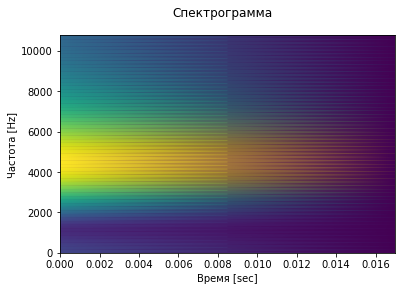

In [38]:
spectrogram(y_new = y_new, lf = 500, window_step = 125, w = exponential_window(125))

Вывод:   
С помощью оконной фильтрации возможно выделение слабых сигналов на фоне более сильных.  

## III) **Линейный фильтр**  
а) Реализовать (во временной шкале!) какой-то из рекурсивных фильтров (Чебышёва, эллиптический...) для того чтобы убрать писк. 
https://ru.wikipedia.org/wiki/%D0%A4%D0%B8%D0%BB%D1%8C%D1%82%D1%80_%D0%A7%D0%B5%D0%B1%D1%8B%D1%88%D1%91%D0%B2%D0%B0  
https://en.wikipedia.org/wiki/Chebyshev_filter  
https://nbviewer.org/github/hukenovs/dsp-theory/blob/master/src/dsp_theory_6_iir_fir_filters.ipynb  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cheby1.html   
https://github.com/yandex/audio-js/blob/master/tutorial/sound.md  
б) Построение АЧХ как аналитически, так и синтез по сгенерированным данным.  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html  
в) Показать какое влияние оказывает на спектрограмму.  
г) Разобраться с построением каскада фильтров. Показать влияние очередности вычислений и округлений на результат.   
https://nbviewer.org/github/hukenovs/dsp-theory/blob/master/src/dsp_theory_8_resampling.ipynb  
http://pts.mi-perm.ru/wp-content/uploads/2019/10/DFilter.pdf - пример для фильтра Баттерворта.  

In [39]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import write
import IPython.display as ipd
from scipy.fft import fft, fftshift

import scipy.signal as sig

In [40]:
# Загрузим исходный файл со звуком
fs, data = wavfile.read('./aufile.wav')
ipd.Audio(data, rate=fs)

In [41]:
# Загрузим файл с писком 4000
fs, y_new = wavfile.read('./audio_tone.wav')
ipd.Audio(y_new, rate=fs)

### а) Реализовать (во временной шкале!) какой-то из рекурсивных фильтров (Чебышёва, эллиптический...) для того чтобы убрать писк.

БИХ фильтр (англ. IIR — «infinite impulse response») - это цифровой фильтр с бесконечной во времени импульсной характеристикой, то есть имеет очень большое или бесконечное число коэффициентов. БИХ фильтры также называют рекурсивными в связи с тем, что при их реализации используются обратные связи (сигнал с выхода фильтра через элементы задержки поступает на фильтр и вносит изменения сам в себя). Передаточная функция БИХ-фильтра имеет дробно-рациональный вид. Основные известные БИХ-фильтры: фильтр Чебышева, Баттерворта, Калмана, Бесселя и т.д.  

Разностное уравнение БИХ-фильтра:
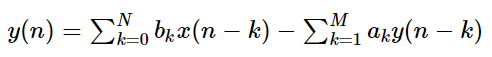
или
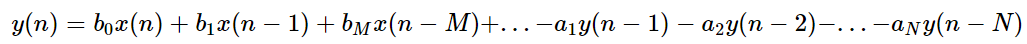
Реализуется при помощи разностной схемы.  
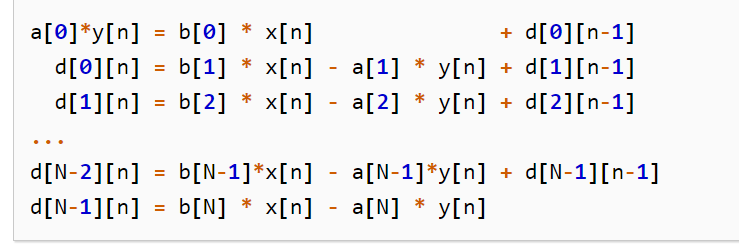
Как видно, выходной сигнал за счет обратных связей влияет сам на себя.

Передаточная характеристика БИХ-фильтра:
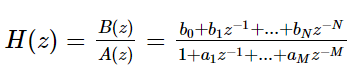

**Порядок фильтра** – максимальная степень в выражении передаточной функции H(z).

**Фильтр Чебышёва** — один из типов линейных аналоговых или цифровых фильтров.   
Амплитудно-частотная характеристика такого фильтра n-го порядка задаётся следующим выражением:   
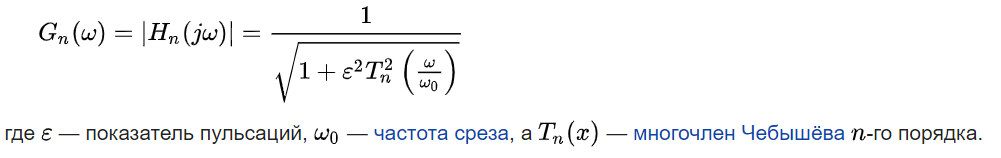  
В полосе пропускания такого фильтра видны пульсации, амплитуда которых определяется показателем пульсации эпсилон.  
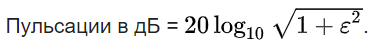  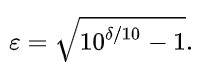  
Пульсации в дБ = rp = дельта.     
Уравнение для полюсов:    
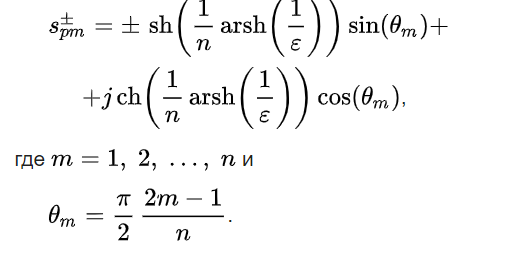    
Передаточная функция должна быть устойчивой, что означает, что её полюса должны иметь отрицательную действительную часть, то есть лежать в левой полуплоскости комплексной плоскости.     
Передаточная функция в этом случае задаётся следующим выражением:      
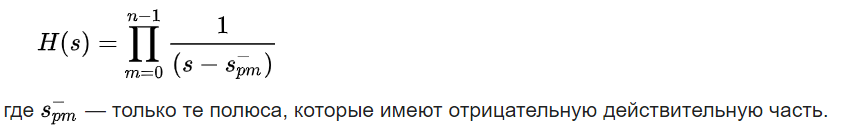  

In [42]:
# Функция, которая возвращает нули, полюсы и коэффициент усиления передаточной функции.
# БИХ-фильтра для N порядкового фильтра Чёбышева типа 1. 
# rp - максимально допустимая пульсация в полосе пропускания ниже единицы, указывается в децибелах.
# Формулы из википедии.

def chebyshev(N, rp, fs, Wn, filter_type = 'low'):
    
    # N - порядок фильтра
    # rp - максимально допустимая пульсация в полосе пропускания ниже единицы, указывается в децибелах.
    # fs - частота дискретизации
    # Wn - критическая частота

    if abs(int(N)) != N:
        raise ValueError("Порядок фильтра должен быть неотрицательным целым")
    elif N == 0:
        return np.array([]), np.array([]), 10**(-rp/20)
    
    z = np.array([])

    # Показатель пульсации
    eps = np.sqrt(10 ** (0.1 * rp) - 1.0)
    mu = 1.0 / N * np.arcsinh(1 / eps)

    # Расположение полюсов на левой половине s-плоскости. 
    m = np.arange(1, N+1, 1)
    theta = np.pi * (2*m-1) / (2*N)
    p = -np.sinh(mu)*np.sin(theta)+1j*np.cosh(mu)*np.cos(theta)
    
    # Коэффициент усиления
    k = np.prod(-p, axis=0).real # произведение элементов по заданной оси
    if N % 2 == 0:
        k = k / np.sqrt((1 + eps * eps)) 

    # Нормализация
    Wn = np.asarray(Wn)
    Wn = 2*Wn/fs
    fs2 = 2.0
    wo = float(2 * fs2 * np.tan(np.pi * Wn / fs2))
    
    # преобразование в критическую частоту
    if filter_type == 'low':
        degree = len(p) - len(z)
        z = wo * z
        p = wo * p
        k = k * wo**degree
    elif filter_type == 'high':
        degree = len(p) - len(z)
        z = wo / z
        p = wo / p
        k = k * np.real(np.prod(-z) / np.prod(-p))        
        

    # билинейное преобразование
    k = k * np.real(np.prod(2.0*fs2 - z) / np.prod(2.0*fs2 - p))
    z = (2.0*fs2 + z) / (2.0*fs2 - z)
    z = np.append(z, -np.ones(degree))
    p = (2.0*fs2 + p) / (2.0*fs2 - p)

    return z, p, k

In [43]:
def zpk_to_ba(z,p, k):
    
    # np.poly находит коэффициенты многочлена по известным значениям корней
    
    b = k * np.poly(z)
    a = np.poly(p)
    
    return a.real, b.real

In [44]:
def my_filtering(a, b, x):
    
    a = a/a[0]
    b = b/a[0]
    d = [0 for i in range(len(b))] # вспомогательный массив
    y = [] # массив для выходного сигнала

    for k in range(len(x)):
        # объявляем начальный индекс коэффициентов массивов a, b
        b_idx = 0
        a_idx = 0

        # определяем значение входного сигнала
        xn = x[k]

        if len(b)>1:
            #Разностная схема по алгоритму выше
            d_idx = 0

            # b[0] * x(n) + d[0](n-1)
            yn = b[b_idx]*xn + d[d_idx] # (на a0 уже разделили) d_idx = 0  

            b_idx+=1 # b_idx = 1
            a_idx+=1 # a_idx = 1

            for n in range(len(b)-2):
                # d[0](n) = d[1](n-1) + b[1]*xn - a[1]*yn
                d[d_idx] = d[d_idx+1] + b[b_idx]*xn - a[a_idx]*yn 
                b_idx+=1
                a_idx+=1
                d_idx+=1  

            # d[N-1](n) = b[N] * x(n) - a[N] * y(n)
            d[d_idx] = b[b_idx]*xn - a[a_idx]*yn
            y.append(d[d_idx])

        else:
            y = x*b
            break            
        
    return y

In [45]:
z, p, k = chebyshev(N = 12, rp = 1, fs = 22050, Wn = 3000)

In [46]:
a, b = zpk_to_ba(z, p, k)

In [47]:
y = my_filtering(a, b, y_new)

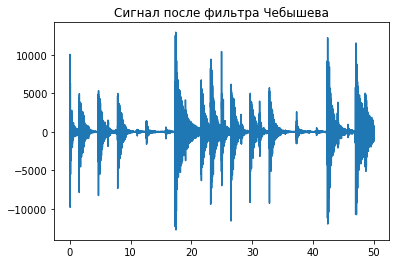

In [48]:
t = np.linspace(0., 50, len(y))
plt.plot(t, y)
plt.title('Сигнал после фильтра Чебышева')
plt.show()

In [49]:
ipd.Audio(y, rate=fs)

### б) Построение АЧХ как аналитически, так и синтез по сгенерированным данным.  
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html  

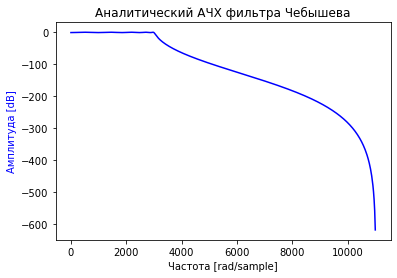

In [50]:
z, p, k = sig.cheby1(10, 1, 3000, 'lp', fs=fs, output='zpk') # нули, полюсы, коэффициент усиления
w, h = sig.freqz_zpk(z, p, k, fs = fs)

plt.title('Аналитический АЧХ фильтра Чебышева')
plt.plot(w, 20 * np.log10(abs(h)), 'b')
plt.ylabel('Амплитуда [dB]', color='b')
plt.xlabel('Частота [rad/sample]')
plt.show()

In [51]:
# Создание синусоид
freq = [i for i in range(300, 8000, 100)]
fs = 22050
length = 4.36
y_array = [sinusoida(fs, f, length, 0, 30000) for f in freq]        

# Фильтрация
sos = sig.cheby1(10, 1, 3000, 'lp', fs=fs, output='sos')
y_array_filtered = [sig.sosfilt(sos, y) for y in y_array]

# Преобразование Фурье
y_fft = [fft(y) for y in y_array]
y_fft_filtered = [fft(y) for y in y_array_filtered]

# Вычисление амплитуды до фильтрации
A_array = []
for yf in y_fft:
    A = np.sum([((yf[i].real)**2+(yf[i].imag)**2)**0.5 for i in range(len(yf))])
    A_array.append(A)
A_array = np.array(A_array)

# Вычисление амплитуды после фильтрации
A_array_filtered = []
for yf in y_fft_filtered:
    A = np.sum([((yf[i].real)**2+(yf[i].imag)**2)**0.5 for i in range(len(yf))])
    A_array_filtered.append(A)
A_array_filtered = np.array(A_array_filtered)

# Отношение
ratio = A_array_filtered/A_array

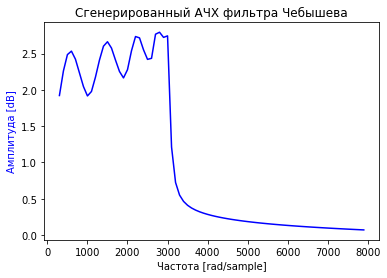

In [52]:
plt.title('Сгенерированный АЧХ фильтра Чебышева')
plt.plot(freq, ratio, 'b')
plt.ylabel('Амплитуда [dB]', color='b')
plt.xlabel('Частота [rad/sample]')
plt.show()

### в) Показать какое влияние оказывает на спектрограмму. 

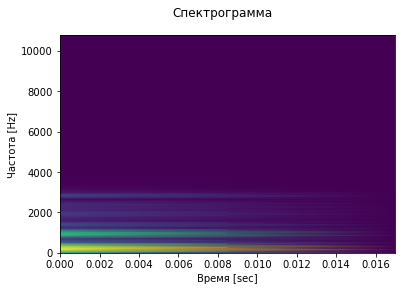

In [53]:
# изменилась область частот.
spectrogram(y_new = y, lf = 500, window_step = 125)

### г) Разобраться с построением каскада фильтров. Показать влияние очередности вычислений и округлений на результат. 

Пусть есть некоторая передаточная функция:  
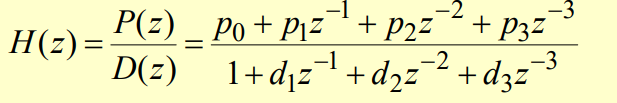  
Каскадом для неё будет разложение числителя и знаменателя на множители.   
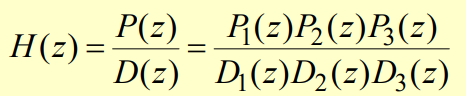 
Обычно на многочлены 1ого и 2ого порядка:  
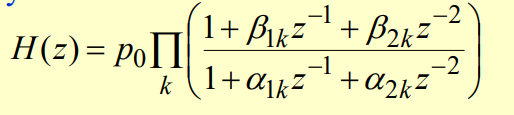
При реализации каскада положение множителей можно менять.  
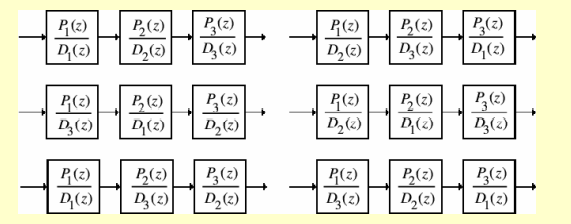  

Уравнение для полюсов фильтра Чёбышева:  
\begin{equation}
s^{\pm}_{pm} = \pm  sh\big(\frac{1}{n}arsh\big( \frac{1}{\varepsilon} \big) \big)sin(\theta_{m})+jch\big( \frac{1}{n}arsh\big( \frac{1}{\varepsilon} \big) \big) cos(\theta_{m}), \quad \theta = \frac{\pi}{2} \frac{2m-1}{n}, \quad m = 1, 2, 3, ... n
\end{equation}
Передаточная функция должна быть устойчивой, что означает, что её полюса должны иметь отрицательную действительную часть, то есть лежать в левой полуплоскости комплексной плоскости. Передаточная функция в этом случае задаётся следующим выражением:  
\begin{equation}
H(s) = \prod_\limits{m=0}^{n-1} \frac{1}{s - s^{-}_{pm}}
\end{equation}
В случае нечётного значения $m = \frac{n+1}{2}$ значение $\theta_m = \frac{\pi}{2}$ получится некратный вещественный полюс. Остальные полюсы образуют комплексно сопряжённые пары.  
Поэтому для m = 2(l+1) + r, где r принимает значение 0 или 1 передаточная функция имееет вид:  
\begin{equation}
H(s) = \frac{1}{ (s + sh( \delta ) ) 
                   \prod\limits_{m=0}^{l}
                    (s - (- sh(\delta) )sin(\theta_{m}) - jch( \delta) ) cos(\theta_{m})) )
                    (s - (- sh(\delta) )sin(\theta_{m}) +  jch(\delta) ) cos(\theta_{m})) )
               },
              \quad \delta = \frac{1}{n}arsh\big( \frac{1}{\varepsilon} \big), \quad \theta_m = \frac{\pi}{2} \frac{2m-1}{n},                   \quad m = 1, 2, 3, ... n, \quad m = 2(l+1) + r, \quad r = 0 , 1
\end{equation}  
Перемножим комплексно-сопряженные корни (каскадная схема биквадратных блоков):  
\begin{equation}
H(s) = \frac{1}{ (s + sh( \delta ) ) 
                   \prod\limits_{m=0}^{l}
                    (s^2+2ssh(\delta)sin(\theta_m) + sh^2(\delta)sin^2(\theta_m)+ch^2(\delta)cos^2(\theta_m))
               },
              \quad \delta = \frac{1}{n}arsh\big( \frac{1}{\varepsilon} \big), \quad \theta_m = \frac{\pi}{2} \frac{2m-1}{n},                   \quad m = 1, 2, 3, ... n, \quad n = 2(l+1) + r, \quad r = 0 , 1
\end{equation}  
Для перехода в Z-область применяется билинейное преобразование:  
\begin{equation}
s = \frac{1-z}{1+z}
\end{equation}
Введем новые обозначения:
\begin{equation}
H(s) = \frac{1}{ (s + c ) 
                   \prod\limits_{m=0}^{l}
                    (s^2+2 a_ms+ b_m)
               }, 
               \quad a_m = sh(\delta)sin(\theta), \quad b_m = sh^2(\delta)sin^2(\theta)+ch^2(\delta)cos^2(\theta) \quad c = sh( \delta )
\end{equation}
После применения билинейного преобразования получим следующий вид передаточной функции
\begin{equation}
H(s) =  \frac{1+z}{(c-1)z+c+1}
                   \prod\limits_{m=0}^{l}
                    \frac{1+2z+z^2}{ (1+2a_m+b_m) + (2b_m - 2)z + (1-2a_m+b_m)z^2 }  
\end{equation}
Получилось разложение передаточной функции на многочлены первого и второго порядка - каскад.

In [54]:
# Загрузим файл с писком 4000
fs, x = wavfile.read('./audio_tone.wav')

In [55]:
# # Фильтр всего звукового сигнала 

t = np.linspace(0., 50, len(x))

sos = sig.cheby1(12, 1, 3000, 'lp', fs=fs, output='sos') # 12 - порядок фильтра
filtered = sig.sosfilt(sos, x)

ipd.Audio(filtered, rate=fs)

IV) **Адаптивный фильтр**  
https://www.youtube.com/watch?v=TykEeAM6v9U&list=PLmu_y3-DV2_kpP8oX_Uug0IbgH2T4hRPL&index=29   
https://scask.ru/a_book_adapt.php?id=79  
https://en.wikipedia.org/wiki/Least_mean_squares_filter  
  
Реализация одного из:  
а) активного шумоподавления  
https://exponenta.ru/news/osnovy-cos-28-aktivnoe-shumopodavlenie  
б) подавление эхо  
в) «обратный» фильтр   

https://www.youtube.com/watch?v=TykEeAM6v9U&list=PLmu_y3-DV2_kpP8oX_Uug0IbgH2T4hRPL&index=29   
**Адаптивные фильтры** могут менять свои характеристики в зависимости от изменяющихся параметров сигнала.  
**Адаптивные фильтры** - это самообучающаяся система, которая изменяет свои внутренние параметры в зависимости от внешнего воздействия по выбранному алгоритму. Они принимают на вход два сигнала и пытаются найти компоненту одного сигнала, коррелированную с другим сигналом. Корректируют свои параметры по значению ошибки - разнице между сигналами.  
В основе системы лежит линейный фильтр, коэффициенты которого изменяются во времени.  
**Задачи адаптивной фильтрации**    
*идентификация системы* - приближение неизвестной системы (может быть модель физического процесса или среды прохождения сигнала), через которую может проходить сигнал, линейной моделью с извесной передаточной функции;  
*подавление шума* - задача, в которой есть возможность получить шумовой сигнал, коррелированный с тем шумом, который оказался замешан с полезным сигналом;    
*линейное предсказание* - позволяет оценить значение сигнала по линейной функции предыдущих значений.  
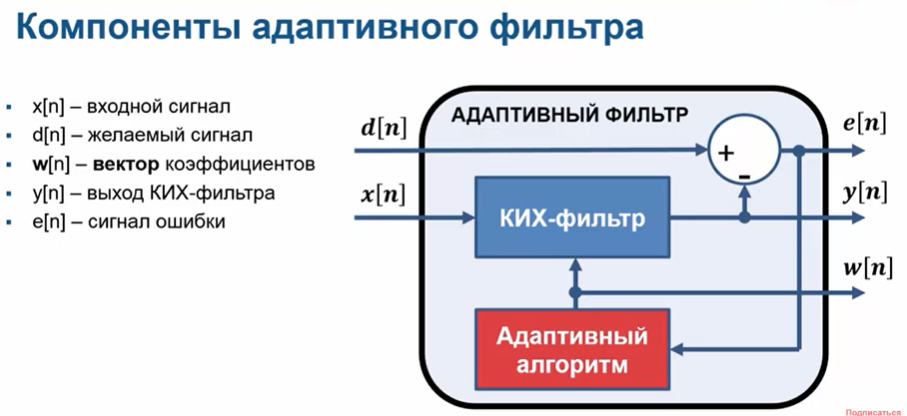

**Принцип активного шумоподавления**  
https://exponenta.ru/news/osnovy-cos-28-aktivnoe-shumopodavlenie  
Есть первый динамик с шумом и сигналом.  
В системах активного шумоподавления используется второй динамик, который генерирует волну обратную по фазе шуму. Таким образом, шум и антишум складываются в противофазе.  
Основная задача это выделение шума.  
Основная сложность в том что зашумленный сигнал не совсем соответствует смеси зашумленного сигнала с сигналом.  
Поэтому здесь и нужна **адаптивная фильтрация**. Тогда в качестве *эталонного сигнала* используется смесь сигнала и шума с первого устройства. В качестве входного сигнала - *коррелированный шум* со второго устройства. Фильтр должен пропустить через себя этот шум и изменить его так, чтобы он стал максимально похож на шум, замешанный с нашим полезным сигналом.  
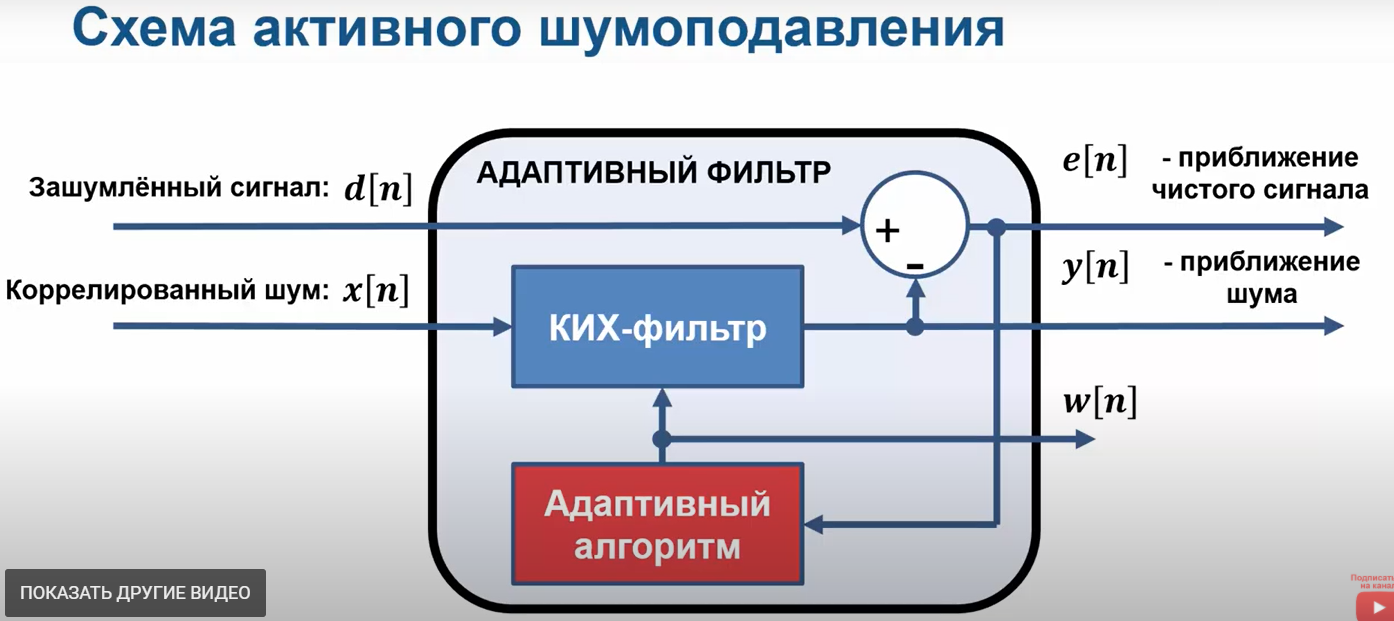
Тогда если мы вычтем полученный после фильтрации шум из смеси, то получим наш приближенный полезный сигнал.  

https://en.wikipedia.org/wiki/Least_mean_squares_filter   
**Алгоритмы наименьших средних квадратов** ( LMS ) представляют собой класс адаптивных фильтров, используемых для имитации желаемого фильтра путем нахождения коэффициентов фильтра, которые относятся к получению наименьшего среднего квадрата сигнала ошибки (разницы между желаемым и фактическим сигналами). Это метод стохастического градиентного спуска, в котором фильтр адаптируется только на основе ошибки в текущий момент времени. Он был изобретен в 1960 году профессором Стэнфордского университета Бернардом Видроу и его первым доктором философии студентом Тедом Хоффом.  
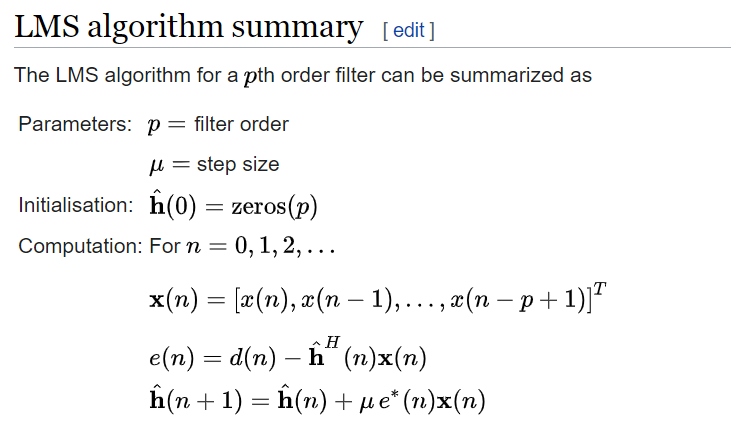

In [56]:
# n - порядок фильтра
# mu - размер шага
# d - желаемый сигнал
# x - входной массив (входной сигнал)

def LMS(d, x, n = 4, mu = 0.5):
    
    # Инициализация значений.
    if mu <=0 or mu >= 1000:
        print('mu за границами допустимых значений.')
        return
    
    h = np.random.normal(0, 0.5, n)
    N = len(x)
    
    if len(d)!=N:
        print('Некорректная длина массива d')
        return    
    
    n = len(x[0])     
    
    x = np.array(x)
    d = np.array(d)
    
    y = np.zeros(N)
    e = np.zeros(N)
    
    h_history = np.zeros((N,n))
    
    for k in range(N):
        h_history[k,:] = h
        
        y[k] = np.dot(h, x[k])
        e[k] = d[k] - y[k]
        dh =  mu * e[k] * x[k]
        h = h + dh
    
    return y, e, h_history    

In [57]:
# Загрузим файл со звуком синтезатора
fssin, sintezator = wavfile.read('./sintezator.wav')
ipd.Audio(sintezator[:,1], rate = fssin)

In [58]:
# # можно сгенерировать шум
length = 300000
v = np.random.normal(0, 1, length)*0.06  # шум 

# Нормировка, чтобы добавить шум
zvuk = sintezator[:,1][:length]/np.max(sintezator[:,1][:length])

# объединим звук синтезатора и шум
d = np.array(zvuk + v)
ipd.Audio(d, rate = fssin)

In [59]:
order = 60
# Сгенерированный шум для фильтра
generated_shum = np.random.random((length, order)) 
y, e, w = LMS(d, generated_shum, n = order, mu = 0.05)
# y - выходной сигнал - приближение шума
# e - сигнал ошибки - приближение чистого сигнала

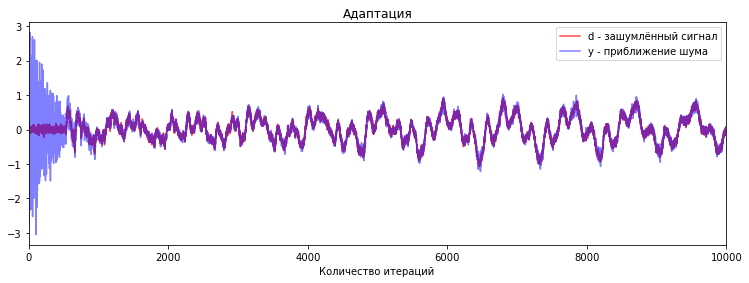

In [60]:
plt.figure(figsize=(12.5,9))
plt.subplot(211);
plt.title("Адаптация");
plt.xlabel("Количество итераций ")
plt.plot(d,color = "red",alpha = 0.7,  label="d - зашумлённый сигнал")
plt.plot(y,color = "blue", alpha = 0.5, label="y - приближение шума")
plt.xlim(0, 10000)
plt.legend(loc='upper right')
plt.show()

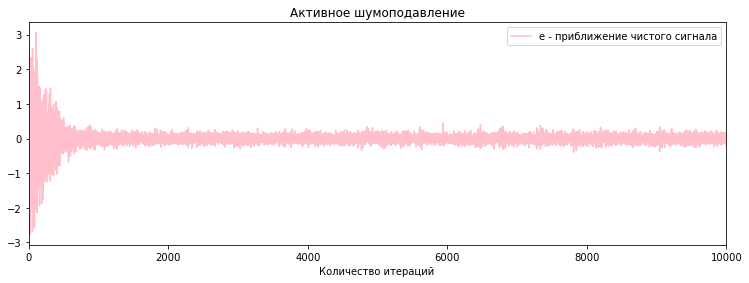

In [61]:
plt.figure(figsize=(12.5,9))
plt.subplot(211);
plt.title("Активное шумоподавление");
plt.xlabel("Количество итераций ")
plt.plot(e,color = "pink", alpha = 1,  label="e - приближение чистого сигнала")
plt.xlim(0, 10000)
plt.legend(loc='upper right')
plt.show()

In [62]:
ipd.Audio(e, rate = fssin)